In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import codecs
import statsmodels
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sc
import matplotlib as mt

In [120]:
agent = pd.read_excel("C:\\Users\\Justyna\\Python Scripts\\ultimatum2\\data\\agentsTouch.xlsx")

In [59]:
#agent.head()

In [60]:
agent.describe()

,ID,atrakcyjnosc_Alejandro,status_Alejandro,homo_Alejandro,afekt_Alejandro,intensywnosc_Alejandro,approachavoid_Alejandro,atrakcyjnosc_Hector,status_Hector,homo_Hector,...,t_nice_LS,t_natural_HS,t_surprising_HS,t_pleasant_HS,t_weak_HS,t_adequate_HS,t_wellsync_HS,t_strange_HS,t_frightening_HS,t_nice_HS
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,16.442308,49.500000,68.596154,65.519231,53.365385,24.192308,51.557692,24.211538,30.538462,60.057692,...,2.384615,2.884615,2.711538,2.480769,2.500000,3.153846,3.596154,2.788462,1.807692,2.442308
std,8.637387,18.578398,11.920093,19.695217,17.586792,28.455702,16.599567,18.838151,14.435063,23.715151,...,1.174130,1.022374,1.160401,1.093481,1.093654,1.055046,1.107189,1.090719,0.886466,1.144697
min,0.000000,0.000000,38.000000,4.000000,20.000000,0.000000,7.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.750000,38.750000,62.000000,52.500000,43.750000,0.000000,47.000000,8.750000,23.000000,41.750000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000
50%,17.000000,51.000000,69.500000,68.500000,51.500000,12.000000,50.000000,23.500000,28.000000,60.000000,...,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,2.500000
75%,23.250000,60.250000,76.000000,82.250000,63.250000,46.500000,58.000000,35.250000,42.250000,78.500000,...,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,2.000000,3.000000
max,32.000000,100.000000,95.000000,100.000000,100.000000,100.000000,100.000000,66.000000,60.000000,100.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000


In [61]:
agent.groupby("country")[['status_Alejandro', 
             'status_Hector', 
             'homo_Alejandro',
             'homo_Hector',
             'atrakcyjnosc_Hector', 
             'atrakcyjnosc_Alejandro']].mean()

,status_Alejandro,status_Hector,homo_Alejandro,homo_Hector,atrakcyjnosc_Hector,atrakcyjnosc_Alejandro
country,,,,,,
cat,73.074074,30.62963,73.814815,75.185185,22.259259,49.00
pl,63.760000,30.44000,56.560000,43.720000,26.320000,50.04


In [62]:
agent.groupby("country")[['status_Alejandro', 
             'status_Hector', 
             'homo_Alejandro',
             'homo_Hector',
             'atrakcyjnosc_Hector', 
             'atrakcyjnosc_Alejandro']].std()

,status_Alejandro,status_Hector,homo_Alejandro,homo_Hector,atrakcyjnosc_Hector,atrakcyjnosc_Alejandro
country,,,,,,
cat,8.818363,11.682163,14.570880,16.895691,20.182995,21.872005
pl,13.068027,17.173332,20.814818,18.718351,17.432537,14.650028


In [63]:
agent.columns

Index(['country', 'ID', 'atrakcyjnosc_Alejandro', 'status_Alejandro',
       'homo_Alejandro', 'afekt_Alejandro', 'rozpoznanie_Alejandro',
       'intensywnosc_Alejandro', 'approachavoid_Alejandro',
       'atrakcyjnosc_Hector', 'status_Hector', 'homo_Hector', 'afekt_Hector',
       'rozpoznanie_Hector', 'intensywnosc_Hector', 'approachavoid_Hector',
       't_natural_LS', 't_surprising_LS', 't_pleasant_LS', 't_weak_LS',
       't_adequate_LS', 't_wellsync_LS', 't_strange_LS', 't_frightening_LS',
       't_nice_LS', 't_natural_HS', 't_surprising_HS', 't_pleasant_HS',
       't_weak_HS', 't_adequate_HS', 't_wellsync_HS', 't_strange_HS',
       't_frightening_HS', 't_nice_HS', 'notes'],
      dtype='object')

In [64]:
pl = agent[agent["country"] == "pl"]
cat = agent[agent["country"] == "cat"]

# testing significance of mean differences

In [65]:
import scipy
from scipy.stats import ttest_ind

In [ ]:
# a two-sided test for the null hypothesis that 
#2 independent samples have identical average (expected) values. 
#This test assumes that the populations have identical variances by default.

scipy.stats.ttest_ind(agent.status_Alejandro, agent.status_Hector, axis=0, equal_var=True, nan_policy='propagate')

In [82]:
scipy.stats.ttest_ind(agent.homo_Alejandro, agent.homo_Hector, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=1.2775680108065244, pvalue=0.20430195389556743)

In [86]:
scipy.stats.ttest_ind(agent.atrakcyjnosc_Alejandro, agent.atrakcyjnosc_Hector, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=6.892311299599539, pvalue=4.659141578248315e-10)

In [ ]:
scipy.stats.t = <scipy.stats._continuous_distns.t_gen object>[source]

# vertical table

In [95]:
#agent pionowo database
ap = pd.read_excel("C:\\Users\\Justyna\\Python Scripts\\ultimatum2\\data\\agentsTouchPion.xlsx")

In [147]:
#labels into numeric, low status = 0, high status = 1 
ap['agentNum'] = ap['agent'].apply(lambda x: 0 if x == "low status" else 1)

#labels into numeric, Catalan culture = 0 , Polish = 1 
ap['culn'] = ap['culture'].apply(lambda x: 0 if x == "Catalan" else 1)

In [148]:
#one way anova with recalculating p value 
print('F-statistic = %6.3f pvalue = %6.4f' %  scipy.stats.f_oneway(ap.status, ap.agentNum))

#values
F, p = scipy.stats.f_oneway(hs.status, hs.agentNum)
print ("F = ", F, "p = ", p)

F-statistic = 464.207 pvalue = 0.0000
F =  1672.199318505694 p =  4.453119191883573e-65


In [149]:
pl = ap[ap["culture"] == "Polish"]
ca = ap[ap["culture"] == "Catalan"]

hs = ap[ap["agent"] == "high status"]
ls = ap[ap["agent"] == "low status"]

In [145]:
#one way anova with recalculating p value - only high status between 
print('Poland: F-statistic = %6.3f pvalue = %6.4f' %  scipy.stats.f_oneway(pl.status, pl.agentNum))

#only Catalan
print('Catalonia: F-statistic = %6.3f pvalue = %6.4f' %  scipy.stats.f_oneway(ca.status, ca.agentNum))

Poland: F-statistic = 212.244 pvalue = 0.0000
Catalonia: F-statistic = 252.376 pvalue = 0.0000


In [150]:
#differences between countries - something is wrong (test?)
#one way anova with recalculating p value - only high-status agent between countries
print('status HSA: F-statistic = %6.3f pvalue = %6.4f' %  scipy.stats.f_oneway(hs.status, hs.culn))

#only low-status agent
print('status LSA: F-statistic = %6.3f pvalue = %6.4f' %  scipy.stats.f_oneway(ls.status, ls.culn))

print('masculinity HSA: F-statistic = %6.3f pvalue = %6.4f' %  scipy.stats.f_oneway(hs.masculinity, hs.culn))

#only low-status agent
print('masculinity LSA: F-statistic = %6.3f pvalue = %6.4f' %  scipy.stats.f_oneway(ls.masculinity, ls.culn))

#I don't take these values because they are different from what I got in SPSS and I don't know why (so I trust SPSS more)

status HSA: F-statistic = 1694.951 pvalue = 0.0000
status LSA: F-statistic = 225.189 pvalue = 0.0000
masculinity HSA: F-statistic = 566.679 pvalue = 0.0000
masculinity LSA: F-statistic = 328.028 pvalue = 0.0000


In [130]:
print(ap.groupby(["agent", "culture"])[['attractiveness', 
                                           'status', 'masculinity']].describe())

                    attractiveness                                          \
                             count       mean        std   min   25%   50%   
agent       culture                                                          
high status Catalan           27.0  49.000000  21.872005   0.0  38.0  53.0   
            Polish            25.0  50.040000  14.650028  27.0  39.0  51.0   
low status  Catalan           27.0  22.259259  20.182995   0.0   5.0  20.0   
            Polish            25.0  26.320000  17.432537   0.0  16.0  29.0   

                                 status             ...                \
                      75%    max  count       mean  ...     75%   max   
agent       culture                                 ...                 
high status Catalan  63.5   81.0   27.0  73.074074  ...    80.5  90.0   
            Polish   56.0  100.0   25.0  63.760000  ...    72.0  95.0   
low status  Catalan  33.5   66.0   27.0  30.629630  ...    42.5  50.0   
            Pol

In [22]:
print(agent.columns)

Index(['culture', 'ID', 'agent', 'attractiveness', 'status', 'masculinity',
       'afect', 'whatemotion', 'intesitiy', 'approachavoid', 't_surprising',
       't_pleasant', 't_weak', 't_adequate', 't_wellsync', 't_strange',
       't_frightening', 't_nice'],
      dtype='object')


In [129]:
print(ap.groupby([ "culture", "agent"])[['attractiveness', 'status', 'masculinity']].mean(),
      "                                         ",
      ap.groupby(["culture", "agent"])[['attractiveness', 'status', 'masculinity']].std())

                     attractiveness     status  masculinity
culture agent                                              
Catalan high status       49.000000  73.074074    73.814815
        low status        22.259259  30.629630    75.185185
Polish  high status       50.040000  63.760000    56.560000
        low status        26.320000  30.440000    43.720000                                                                attractiveness     status  masculinity
culture agent                                              
Catalan high status       21.872005   8.818363    14.570880
        low status        20.182995  11.682163    16.895691
Polish  high status       14.650028  13.068027    20.814818
        low status        17.432537  17.173332    18.718351


In [138]:
print(pl.groupby("agent")[[ 'status','attractiveness', 'masculinity']].mean(),
     "                          ",
      pl.groupby("agent")[['status', 'attractiveness', 'masculinity']].std())

             status  attractiveness  masculinity
agent                                           
high status   63.76           50.04        56.56
low status    30.44           26.32        43.72                                            status  attractiveness  masculinity
agent                                              
high status  13.068027       14.650028    20.814818
low status   17.173332       17.432537    18.718351


# Plotting

C:\Users\Justyna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Justyna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Justyna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Justyna\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'fa

<Figure size 864x432 with 0 Axes>

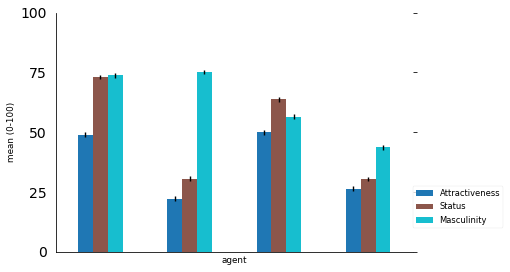

In [49]:
# PLOT

f = plt.figure(figsize=(12,6))
mt.style.use('seaborn-paper')

agent.groupby(["culture", "agent"])[['attractiveness', 'status', 'masculinity']].mean().plot(kind="bar", 
                                                                                             #figsize=(12,6), 
                                                                                             #style="grid", 
                                                                                             fontsize = 14,
                                                                                             colormap = "tab10",
                                                                                             table=False, 
                                                                                             yerr=True, 
                                                                                             stacked=False, 
                                                                                             sort_columns=True) 
                                                                                            #secondary_y = "masculinity")


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#no ticks
plt.tick_params(top='off', bottom='on', left='off', right='on') #labelleft='on', labelbottom='on')
plt.xticks([4], [["1", "2", "3", "4"]])
plt.yticks([0, 25, 50, 75, 100])

#labels
plt.xlabel('agent')
plt.ylabel('mean (0-100)')

#scale on y and x axes
plt.ylim(0, 100)
#plt.xlim(-3, 2.5)

#legend
plt.legend(('Attractiveness', 'Status', 'Masculinity'), loc=[1,0.1], fontsize='small')

#saving
#plt.savefig('bar.png', transparent=True)


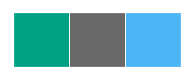

In [154]:
# setting palette
pal = ["#01A183", "#696969", "#4Cb5F5"]
sns.palplot(sns.color_palette(pal))

C:\Users\Justyna\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Justyna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


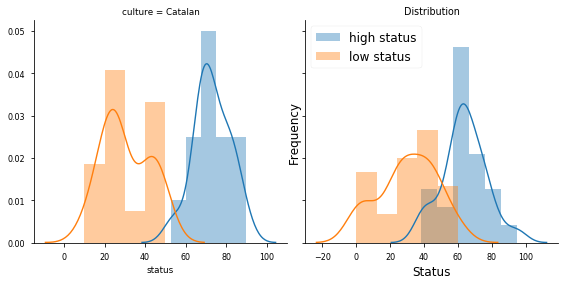

In [53]:
g = sns.FacetGrid(agent, col='culture', hue="agent", aspect=1, size=4, palette="tab10", legend_out=True, sharex=False,)
g.map(sns.distplot, "status")

#g.map(sns.distplot, "masculinity")
#g.map(sns.distplot, "attractiveness")
# bins=10, )
plt.xlabel('Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Distribution")
plt.legend(fontsize=12) 

#scale on y and x axes
#plt.ylim(0, 100)
#plt.xlim(-3, 2.5)

#g.savefig("rozklad_wiek0.png", dpi = (300))
#sns.plt.show()

In [217]:
 print("Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r")
    

Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_ra

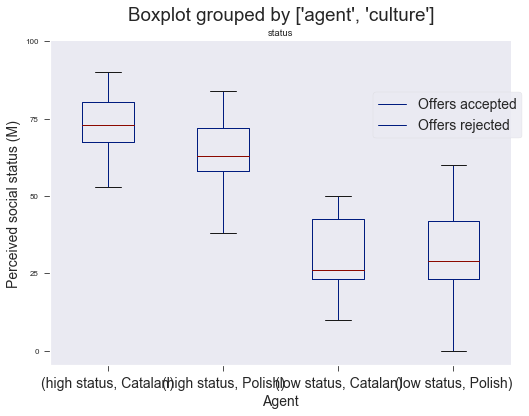

In [218]:
mt.style.use('seaborn-paper')


f = plt.figure(figsize=(12,6))

agent.boxplot(column='status', 
            by=['agent', 'culture'], 
            fontsize=14, 
            rot=0, 
            grid=False, 
            figsize=(8,6), 
            return_type='dict')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Agent', fontsize=14)
plt.ylabel('Perceived social status (M)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks([0, 25, 50, 75,100], fontsize=8)
#plt.ylim(-5, 100)
#plt.xlim(-3, 2.5)

#legend
plt.legend(('Offers accepted', 'Offers rejected'), 
           loc=[0.7, 0.7], fontsize=14)

#f.savefig('acceptedReject.png', transparent=True, figsize=(8,6))

In [65]:
agent.plot?

C:\Users\Justyna\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


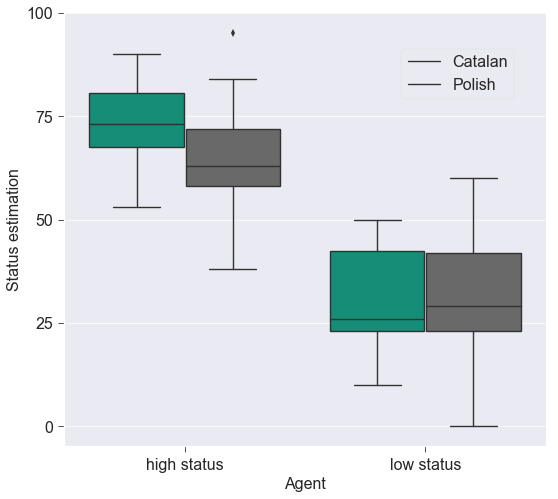

In [221]:
mt.style.use('seaborn-paper')

sns.factorplot(x="agent", 
                   y="status", 
                   hue="culture", 
                   data=agent, 
                   ci=95, 
                   n_boot=1000, 
                   kind='box', 
                   height=7, 
                   aspect=1.1, 
                   color="#FFFFFF", 
                   palette=pal,
                   #legend=True, 
                   legend_out=False, 
                   sharex=True, 
                   sharey=False, 
                   margin_titles=False)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Agent', fontsize=16)
plt.ylabel('Status estimation', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks([0, 25, 50, 75,100], fontsize=16)
#plt.ylim(-5, 100)
#plt.xlim(-3, 2.5)

#legend
plt.legend(('Catalan','Polish'), 
           loc=[0.7, 0.8], 
           fontsize=16)


plt.show()

In [222]:
from seaborn import catplot

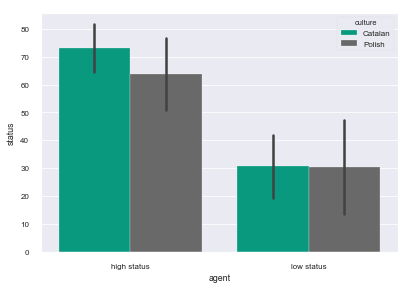

In [223]:
a  = sns.barplot(x="agent", y="status", hue= "culture", data= agent, color="#FFFFFF", 
                 palette=pal, ci = "sd", 
                 saturation=0.9, 
                 errcolor='.26')
plt.show()

In [69]:
sns.barplot?

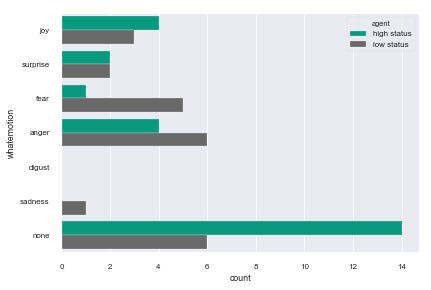

In [227]:
sns.countplot(y="whatemotion", hue = "agent", data=agent[agent["culture"] == "Catalan"], 
                  order=["joy", "surprise", "fear", "anger", "digust", "sadness", "none"], hue_order=None, orient="h", 
                  color=None, palette=pal, saturation=0.9)

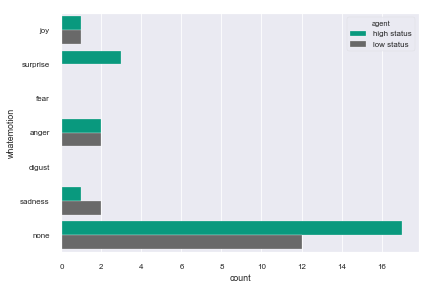

In [229]:
sns.countplot(y="whatemotion", hue = "agent", data=agent[agent["culture"] == "Polish"], 
                  order=["joy", "surprise", "fear", "anger", "digust", "sadness", "none"], hue_order=None, orient="h", 
                  color=None, palette=pal, saturation=0.9, 
                  dodge=True, ax=None)

In [230]:
from seaborn import catplot

In [231]:
##ustawienie czcionki 
font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

<Figure size 576x432 with 0 Axes>

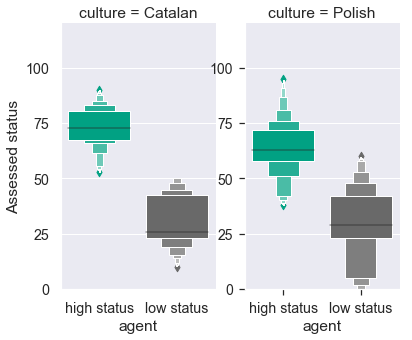

In [162]:
sns.set(font_scale=1.3)

g = plt.figure(figsize=(8,6))#, frameon=False)


g = sns.catplot(x="agent", y="status", col="culture", data=agent, saturation=1.3,
                kind="boxen", ci="sd", aspect=0.6, palette = pal, legend = True, 
                legend_out = True, margin_titles=False, height=5, sharex=False, sharey=True)
g.set_axis_labels("agent", "Assessed status").set_xticklabels()


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.yticks([0, 25, 50, 75,100], fontsize=14)
plt.ylim(0, 120)




g.savefig('status.png', transparent=True, figsize=(7,6), dpi = 300)

In [174]:
sns.catplot?

<Figure size 576x432 with 0 Axes>

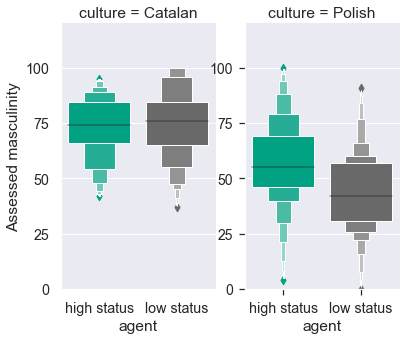

In [166]:
sns.set(font_scale=1.3)

g = plt.figure(figsize=(8,6))#, frameon=False)


g = sns.catplot(x="agent", y="masculinity", col="culture", data=ap, saturation=1.3,
                kind="boxen", ci="sd", aspect=0.6, palette = pal, legend = True, 
                legend_out = True, margin_titles=False, height=5, sharex=False, sharey=True)
g.set_axis_labels("agent", "Assessed masculinity").set_xticklabels()


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.yticks([0, 25, 50, 75,100], fontsize=14)
plt.ylim(0, 120)



g.savefig('masculinity.png', transparent=True, figsize=(7,6), dpi = 300)

<Figure size 576x432 with 0 Axes>

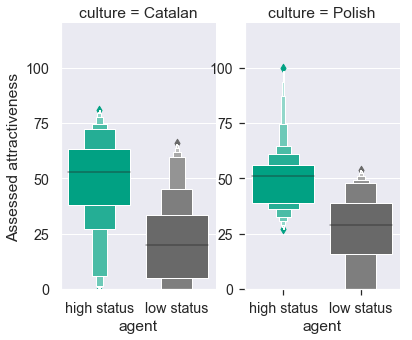

In [164]:
sns.set(font_scale=1.3)

g = plt.figure(figsize=(8,6))#, frameon=False)


g = sns.catplot(x="agent", y="attractiveness", col="culture", data=ap, saturation=1.3,
                kind="boxen", ci="sd", aspect=0.6, palette = pal, legend = True, 
                legend_out = True, margin_titles=False, height=5, sharex=False, sharey=True)
g.set_axis_labels("agent", "Assessed attractiveness").set_xticklabels()


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.yticks([0, 25, 50, 75,100], fontsize=14)
plt.ylim(0, 120)


g.savefig('attractiveness.png', transparent=True, figsize=(7,6), dpi = 300)

In [168]:
sns.FacetGrid?